In [18]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt

In [4]:
df_train = pd.read_csv('./train.csv',index_col = 'id')
df_test = pd.read_csv('./test.csv',index_col =  'id')
df_train.sample(5)

,keyword,location,text,target
id,,,,
7194,mudslide,NaN,@nikistitz even the one that looked like a mud...,0
10156,upheaval,Connecticut,A look at state actions a year after Ferguson'...,1
4924,exploded,Australia,Junko was 13 years old when the atomic bomb ex...,1
2451,collide,NaN,Secrets of the world collide but i leave the p...,0
5252,fatality,"Nashville, TN",Truck crash on 40w at US70 in Lebanon is a fat...,1


In [5]:
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

Train shape: (7613, 4)
Test shape: (3263, 3)


In [6]:

for df in [df_train, df_test]:
    for col in df.columns:
        print(col,np.round(sum(df[col].isna())/len(df_train),4),'na value')
    print()


keyword 0.008 na value
location 0.3327 na value
text 0.0 na value
target 0.0 na value

keyword 0.0034 na value
location 0.1451 na value
text 0.0 na value



In [7]:
df_train.keyword.fillna("unknown",inplace=True)
df_train.location.fillna("unknown",inplace=True)
df_test.keyword.fillna("unknown",inplace=True)
df_test.location.fillna("unknown",inplace=True)

In [25]:
series = df_train.groupby(['location']).location.count().sort_values(ascending=False)

series[:40]

location
unknown              2533
USA                   104
New York               71
United States          50
London                 45
Canada                 29
Nigeria                28
UK                     27
Los Angeles, CA        26
India                  24
Mumbai                 22
Washington, DC         21
Kenya                  20
Worldwide              19
Australia              18
Chicago, IL            18
California             17
New York, NY           15
Everywhere             15
California, USA        15
Florida                14
United Kingdom         14
San Francisco          14
Washington, D.C.       13
Los Angeles            13
Indonesia              13
NYC                    12
Ireland                12
Toronto                12
Seattle                11
Chicago                11
Earth                  11
San Francisco, CA      11
London, UK             10
London, England        10
Texas                  10
New York City          10
Atlanta, GA            10
ss 

([<matplotlib.patches.Wedge at 0x7fb19b45f6d0>,
 [Text(1.0998786198094859, 0.016340798205130472, 'ablaze'),
  Text(1.0989278691353694, 0.048554489366035194, 'accident'),
  Text(1.0971000853543047, 0.0798210668656944, 'aftershock'),
  Text(1.094382889187282, 0.11102293391051138, 'airplane%20accident'),
  Text(1.0905423831892012, 0.14393509116271003, 'ambulance'),
  Text(1.0857851459510166, 0.17626859286931956, 'annihilated'),
  Text(1.0808361785396865, 0.2044337427132003, 'annihilation'),
  Text(1.0753482263650105, 0.2315732973674345, 'apocalypse'),
  Text(1.0677764364597864, 0.26429809257964737, 'armageddon'),
  Text(1.0589637192272723, 0.2976505356291887, 'army'),
  Text(1.0504652760130004, 0.32637816086700855, 'arson'),
  Text(1.0411876653825873, 0.35486369982735255, 'arsonist'),
  Text(1.0305040246076616, 0.38478754562409123, 'attack'),
  Text(1.0187894812779092, 0.4148107916116562, 'attacked'),
  Text(1.0072978699198811, 0.44198529529258146, 'avalanche'),
  Text(0.9968159683579085,

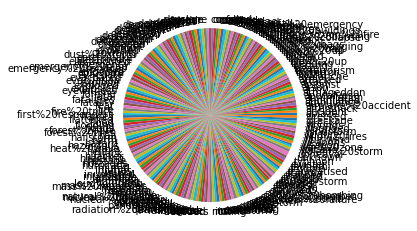

In [19]:
plt.pie(series.values,labels=series.index)
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)

Text(0.5, 1.0, 'Real disaster or not distribution')

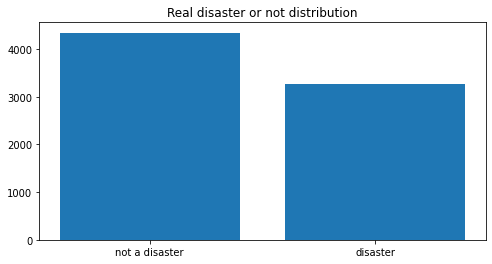

In [20]:

target_count = df_train.target.value_counts()
plt.figure(figsize=(8,4))
plt.bar(['not a disaster','disaster'], target_count.values)
plt.title("Real disaster or not distribution")